<a href="https://colab.research.google.com/github/sahal-mulki/aerolens/blob/main/final%20tempo%20-%20pyrsig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyrsig xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.5 MB/s eta 0:00:00


In [2]:

!pip install geopandas



In [22]:
pyrsig.descriptions()

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
0,airnow.pm25,pm25(ug/m3),UTC hourly mean surface measured particulate m...,-157 21 -51 59,2003-01-02T00:00:00Z,PT1H,now,airnow
1,airnow.pm10,pm10(ug/m3),UTC hourly mean surface measured particulate m...,-157 21 -51 59,2003-01-02T00:00:00Z,PT1H,now,airnow
2,airnow.ozone,ozone(ppb),UTC hourly mean surface measured ozone concent...,-157 21 -51 64,2003-01-02T00:00:00Z,PT1H,now,airnow
3,airnow.no,no(ppb),UTC hourly mean surface measured nitric oxide ...,-157 21 -51 64,2003-01-02T00:00:00Z,PT1H,now,airnow
4,airnow.no2,no2(ppb),UTC hourly mean surface measured nitrogen diox...,-157 21 -51 64,2003-01-02T00:00:00Z,PT1H,now,airnow
...,...,...,...,...,...,...,...,...
8227,nldas.pressure,pressure(Pa),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas
8228,nldas.humidity,humidity(kg/kg),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas
8229,nldas.temperature,temperature(K),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas
8230,nldas.wind,wind(m/s),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('timeResolution').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timeResolution')):
  _plot_series(series, series_name, i)
  fig.legend(title='timeResolution', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timeResolution']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timeResolution'}, axis=1)
              .sort_values('timeResolution', ascending=True))
  xs = counted['timeResolution']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('timeResolution', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timeResolution')):
  _plot_series(series, series_name, i)
  fig.legend(title='timeResolution', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timeResolution')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['timeResolution'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='timeResolution', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [68]:
import pandas as pd
import numpy as np
import xarray as xr
import pyrsig
import os

# Ensure the pycno cache directory exists
os.makedirs(os.path.expanduser('~/.pycno'), exist_ok=True)

# --- Constants for TEMPO Variables ---
TEMPO_VARIABLE_MAP = {
    'O3': 'tempo.l3.o3tot.column_amount_o3',
    # Use the new, potentially smaller, NO2 variable
    'NO2': 'tempo.l3.no2.vertical_column_total',
    'HCHO': 'tempo.l3.hcho.vertical_column' # Assuming HCHO might also be large
}

TEMPO_COLUMN_MAP = {
    'O3': 'o3_column_amount_o3(DU)',
    # Update the column name to match the new variable
    'NO2': 'no2_vertical_column_total(molecules/cm2)',
    'HCHO': 'vertical_column(molecules/cm2)'
}

# --- TEMPO Data Functions ---

def get_tempo_heatmap_data(species, start_date, end_date, bbox, lat_bins=10, lon_bins=10):
    """
    Fetches TEMPO data for a specific time and location and grids it for a heatmap.

    Args:
        species (str): The species to fetch ('O3', 'NO2', or 'HCHO').
        start_date (str): The start date for the query (e.g., '2025-09-29 00').
        end_date (str): The end date for the query (e.g., '2025-09-30 23:59:59').
        bbox (tuple): Bounding box (min_lon, min_lat, max_lon, max_lat).
        lat_bins (int): Number of latitude bins for the grid.
        lon_bins (int): Number of longitude bins for the grid.

    Returns:
        xr.DataArray: A 2D xarray DataArray of the mean species concentration, or None on error.
    """
    if species.upper() not in TEMPO_VARIABLE_MAP:
        raise ValueError("Species not supported. Choose from 'O3', 'NO2', 'HCHO'.")

    variable_key = TEMPO_VARIABLE_MAP[species.upper()]
    column_name = TEMPO_COLUMN_MAP[species.upper()]

    try:
        rsig_api = pyrsig.RsigApi(bdate=start_date, edate=end_date, bbox=bbox)

        df = rsig_api.to_dataframe(variable_key, parse_dates=True, unit_keys=True)
        print(df)
        if df.empty:
            print(f"No TEMPO data found for {species} in the given time/location.")
            return None

        df['time'] = pd.to_datetime(df['time'], utc=True)

        # Create grid edges from the provided bbox
        latedges = np.linspace(bbox[1], bbox[3], lat_bins + 1)
        lonedges = np.linspace(bbox[0], bbox[2], lon_bins + 1)

        # Bin the data using the midpoints of the bins as labels
        latbin = pd.cut(df['LATITUDE(deg)'], latedges, labels=(latedges[:-1] + latedges[1:]) / 2).astype('f')
        lonbin = pd.cut(df['LONGITUDE(deg)'], lonedges, labels=(lonedges[:-1] + lonedges[1:]) / 2).astype('f')

        # Group, calculate mean, and convert to xarray
        ds = df.groupby([
            pd.Grouper(key='time', freq='1h'), latbin, lonbin
        ]).mean(numeric_only=True)[[column_name]].to_xarray()

        # Return the mean over the time dimension for a 2D heatmap
        return ds[column_name].mean('time')
    except Exception as e:
        print(f"Error creating heatmap data for {species}: {e}")
        return None

def get_tempo_averaged_data(species, start_date, end_date, bbox, freq='1H'):
    """
    Fetches and returns time-averaged TEMPO data for a specific time and location.

    Args:
        species (str): The species to fetch ('O3', 'NO2', or 'HCHO').
        start_date (str): The start date for the query.
        end_date (str): The end date for the query.
        bbox (tuple): Bounding box for the query.
        freq (str): The pandas frequency string for grouping (e.g., '1H' for hourly).

    Returns:
        pd.Series: A time-series of averaged data, or None on error.
    """
    if species.upper() not in TEMPO_VARIABLE_MAP:
        raise ValueError("Species not supported. Choose from 'O3', 'NO2', 'HCHO'.")

    variable_key = TEMPO_VARIABLE_MAP[species.upper()]
    column_name = TEMPO_COLUMN_MAP[species.upper()]

    try:
        rsig_api = pyrsig.RsigApi(bdate=start_date, edate=end_date, bbox=bbox)
        df = rsig_api.to_dataframe(variable_key, parse_dates=True, unit_keys=True)
        if df.empty:
            print(f"No TEMPO data found for {species} in the given time/location.")
            return None

        df['time'] = pd.to_datetime(df['time'], utc=True)
        averaged_series = df.groupby(pd.Grouper(key='time', freq=freq)).mean(numeric_only=True)[column_name]
        return averaged_series
    except Exception as e:
        print(f"Error fetching averaged TEMPO data for {species}: {e}")
        return None

# --- AirNow and Correlation Functions (also updated for flexibility) ---

def get_airnow_variables():
    """
    Lists all available variable keys from the AirNow dataset.
    Initializes a temporary API object to fetch keys.
    """
    try:
        # A minimal API object is needed just to access the keys
        temp_api = pyrsig.RsigApi(bdate='2024-01-01 00', edate='2024-01-01 01', bbox=(-1, -1, 1, 1))
        return [k for k in temp_api.keys() if 'airnow' in k]
    except Exception as e:
        print(f"Could not fetch AirNow variables: {e}")
        return []

def calculate_aqi(pollutant, concentration):
    """
    Calculates the Air Quality Index (AQI) for a given pollutant and concentration.
    (This function is unchanged as it's a pure calculation)
    """
    # EPA AQI Breakpoints
    breakpoints = {
        'O3_8hr': [(0, 50, 0, 54), (51, 100, 55, 70), (101, 150, 71, 85), (151, 200, 86, 105), (201, 300, 106, 200)],
        'PM25': [(0, 50, 0.0, 12.0), (51, 100, 12.1, 35.4), (101, 150, 35.5, 55.4), (151, 200, 55.5, 150.4), (201, 300, 150.5, 250.4)],
        'CO': [(0, 50, 0.0, 4.4), (51, 100, 4.5, 9.4), (101, 150, 9.5, 12.4), (151, 200, 12.5, 15.4), (201, 300, 15.5, 30.4)],
        'SO2_1hr': [(0, 50, 0, 35), (51, 100, 36, 75), (101, 150, 76, 185), (151, 200, 186, 304)],
        'NO2': [(0, 50, 0, 53), (51, 100, 54, 100), (101, 150, 101, 360), (151, 200, 361, 649)]
    }
    categories = {(0, 50): "Good", (51, 100): "Moderate", (101, 150): "Unhealthy for Sensitive Groups", (151, 200): "Unhealthy", (201, 300): "Very Unhealthy", (301, 500): "Hazardous"}
    pollutant_map = {'O3': 'O3_8hr', 'PM25': 'PM25', 'CO': 'CO', 'SO2': 'SO2_1hr', 'NO2': 'NO2'}
    key = pollutant_map.get(pollutant.upper())
    if not key: return None, "Pollutant not supported"
    for I_low, I_high, C_low, C_high in breakpoints[key]:
        if C_low <= concentration <= C_high:
            aqi = round(((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low)
            for (start, end), cat in categories.items():
                if start <= aqi <= end: return aqi, cat
    if concentration > breakpoints[key][-1][3]: return 500, "Hazardous"
    return None, "Concentration out of range"


def correlate_tempo_airnow(start_date, end_date, bbox, tempo_species='O3', airnow_species='ozone', freq='1H'):
    """
    Fetches, aligns, and correlates TEMPO and AirNow data.
    Corrected to handle the RangeIndex error by setting the time index for AirNow data.

    Returns:
        dict: A dictionary of correlation coefficients, or None on error.
    """
    try:
        rsig_api = pyrsig.RsigApi(bdate=start_date, edate=end_date, bbox=bbox)

        # --- Get TEMPO data (this part is usually fine) ---
        tempo_var_key = TEMPO_VARIABLE_MAP[tempo_species.upper()]
        tempo_col_name = TEMPO_COLUMN_MAP[tempo_species.upper()]
        tempo_df = rsig_api.to_dataframe(tempo_var_key, parse_dates=True, unit_keys=True)
        if tempo_df.empty:
            print(f"No TEMPO data found for {tempo_species}.")
            return None
        tempo_df['time'] = pd.to_datetime(tempo_df['time'], utc=True)
        tempo_series = tempo_df.groupby(pd.Grouper(key='time', freq=freq)).mean(numeric_only=True)[tempo_col_name]

        # --- Get AirNow data ---
        airnow_var_key = f'airnow.{airnow_species.lower()}'
        airnow_df = rsig_api.to_dataframe(airnow_var_key, parse_dates=True, unit_keys=True)
        if airnow_df.empty:
            print(f"No AirNow data found for {airnow_species}.")
            return None

        # --- FIX IS HERE ---
        # 1. Ensure the 'time' column is a proper datetime object (it should be, but this is safe)
        airnow_df['time'] = pd.to_datetime(airnow_df['time'], utc=True)
        # 2. Set this 'time' column as the DataFrame's index.
        airnow_df.set_index('time', inplace=True)
        # --- FIX ENDS HERE ---

        # Now, the groupby with Grouper will work correctly on the DatetimeIndex
        airnow_col_name = f'{airnow_species.lower()}(ppb)' # Find the correct column name dynamically
        if airnow_col_name not in airnow_df.columns:
            # Fallback for variables that might not have a unit string, e.g. airnow.nox
            airnow_col_name = airnow_species.lower()
            if airnow_col_name not in airnow_df.columns:
                raise KeyError(f"Could not find a column for '{airnow_species}' in the AirNow data.")

        airnow_series = airnow_df.groupby(pd.Grouper(freq=freq)).mean(numeric_only=True)[airnow_col_name]

        # --- Alignment and Correlation (remains the same) ---
        common_idx = airnow_series.index.intersection(tempo_series.index.floor(freq))
        airnow_aligned = airnow_series.loc[common_idx].dropna()
        tempo_aligned = tempo_series.reindex(common_idx, method='nearest').dropna()

        final_common_idx = airnow_aligned.index.intersection(tempo_aligned.index)
        airnow_aligned = airnow_aligned.loc[final_common_idx]
        tempo_aligned = tempo_aligned.loc[final_common_idx]

        if airnow_aligned.empty or tempo_aligned.empty:
            print("No overlapping data found after alignment and cleaning.")
            return None

        return {
            'pearson': airnow_aligned.corr(tempo_aligned, method='pearson'),
            'spearman': airnow_aligned.corr(tempo_aligned, method='spearman'),
            'kendall': airnow_aligned.corr(tempo_aligned, method='kendall')
        }
    except KeyError as ke:
        print(f"Data column not found: {ke}. Please check the 'airnow_species' name.")
        return None
    except Exception as e:
        print(f"Error during correlation: {e}")
        return None

In [57]:
bbox_data2
correlate_tempo_airnow("2025-09-29 00", "2025-09-30 23:59:59", bbox_data2, tempo_species='O3', airnow_species='ozone', freq='1H')

Using cached: ./tempo.l3.o3tot.column_amount_o3_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz


/tmp/ipython-input-4164285160.py:172: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tempo_series = tempo_df.groupby(pd.Grouper(key='time', freq=freq)).mean(numeric_only=True)[tempo_col_name]


Using cached: ./airnow.ozone_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz


/tmp/ipython-input-4164285160.py:196: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  airnow_series = airnow_df.groupby(pd.Grouper(freq=freq)).mean(numeric_only=True)[airnow_col_name]
/tmp/ipython-input-4164285160.py:199: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  common_idx = airnow_series.index.intersection(tempo_series.index.floor(freq))


{'pearson': np.float64(-0.8195761898420085),
 'spearman': np.float64(-0.6),
 'kendall': np.float64(-0.39999999999999997)}

Using cached: ./tempo.l3.o3tot.column_amount_o3_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz


/tmp/ipython-input-569022127.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tempo_series = tempo_df.groupby(pd.Grouper(key='time', freq=freq)).mean(numeric_only=True)[TEMPO_COLUMN_MAP[tempo_species.upper()]]


Using cached: ./airnow.ozone_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz


/tmp/ipython-input-569022127.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  airnow_series = airnow_df.groupby(pd.Grouper(freq=freq)).mean(numeric_only=True)[f'{airnow_species.lower()}(ppb)']
/tmp/ipython-input-569022127.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  common_idx = airnow_series.index.intersection(tempo_series.index.floor(freq))


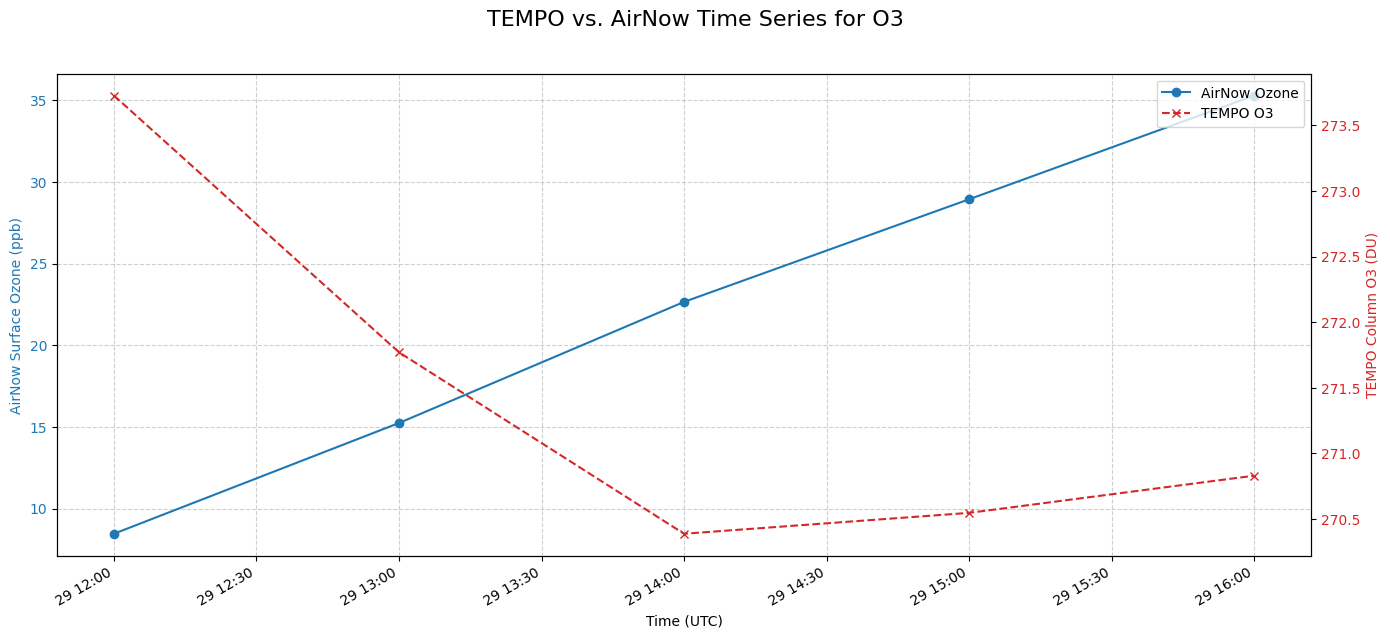

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_timeseries(start_date, end_date, bbox, tempo_species='O3', airnow_species='ozone', freq='1H'):
    """
    Fetches TEMPO and AirNow data and plots them on a dual-axis time-series chart.

    Args:
        (Same parameters as the correlate function)
    """
    try:
        # --- Data Fetching and Processing ---
        rsig_api = pyrsig.RsigApi(bdate=start_date, edate=end_date, bbox=bbox)

        # Get TEMPO data
        tempo_df = rsig_api.to_dataframe(TEMPO_VARIABLE_MAP[tempo_species.upper()], parse_dates=True, unit_keys=True)
        tempo_df['time'] = pd.to_datetime(tempo_df['time'], utc=True)
        tempo_series = tempo_df.groupby(pd.Grouper(key='time', freq=freq)).mean(numeric_only=True)[TEMPO_COLUMN_MAP[tempo_species.upper()]]

        # Get AirNow data
        airnow_df = rsig_api.to_dataframe(f'airnow.{airnow_species.lower()}', parse_dates=True, unit_keys=True)
        airnow_df['time'] = pd.to_datetime(airnow_df['time'], utc=True)
        airnow_df.set_index('time', inplace=True)
        airnow_series = airnow_df.groupby(pd.Grouper(freq=freq)).mean(numeric_only=True)[f'{airnow_species.lower()}(ppb)']

        # --- Alignment for Plotting ---
        common_idx = airnow_series.index.intersection(tempo_series.index.floor(freq))
        airnow_aligned = airnow_series.loc[common_idx].dropna()
        tempo_aligned = tempo_series.reindex(common_idx, method='nearest').dropna()

        final_common_idx = airnow_aligned.index.intersection(tempo_aligned.index)
        airnow_aligned = airnow_aligned.loc[final_common_idx]
        tempo_aligned = tempo_aligned.loc[final_common_idx]

        if airnow_aligned.empty or tempo_aligned.empty:
            print("No overlapping data to plot.")
            return

        # --- Plotting ---
        fig, ax1 = plt.subplots(figsize=(14, 7))

        # Plot AirNow data on the primary y-axis (ax1)
        color1 = 'tab:blue'
        ax1.set_xlabel('Time (UTC)')
        ax1.set_ylabel(f'AirNow Surface {airnow_species.capitalize()} (ppb)', color=color1)
        ax1.plot(airnow_aligned.index, airnow_aligned.values, color=color1, marker='o', linestyle='-', label=f'AirNow {airnow_species.capitalize()}')
        ax1.tick_params(axis='y', labelcolor=color1)
        ax1.grid(True, linestyle='--', alpha=0.6)

        # Create a secondary y-axis (ax2) sharing the same x-axis
        ax2 = ax1.twinx()

        # Plot TEMPO data on the secondary y-axis
        color2 = 'tab:red'
        ax2.set_ylabel(f'TEMPO Column {tempo_species.upper()} (DU)', color=color2)
        ax2.plot(tempo_aligned.index, tempo_aligned.values, color=color2, marker='x', linestyle='--', label=f'TEMPO {tempo_species.upper()}')
        ax2.tick_params(axis='y', labelcolor=color2)

        # --- Final Touches ---
        fig.suptitle(f'TEMPO vs. AirNow Time Series for {tempo_species.upper()}', fontsize=16)
        fig.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle

        # Rotate x-axis labels for better readability
        fig.autofmt_xdate()

        # Add a single legend
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='upper right')

        plt.show()

    except Exception as e:
        print(f"An error occurred while plotting: {e}")

# --- Example Usage ---
# Call the function with your desired parameters
plot_correlation_timeseries(
    start_date='2025-09-29 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data2,
    tempo_species='O3',
    airnow_species='ozone'
)

In [2]:
import numpy as np
from scipy.interpolate import griddata
import xarray as xr

def interpolate_heatmap(data_array, resolution_factor=5):
    """
    Interpolates an xarray.DataArray to a finer grid for a smoother heatmap.
    Corrected version to handle coordinate grid creation properly.

    Args:
        data_array (xr.DataArray): The coarse, binned heatmap data.
        resolution_factor (int): Factor by which to increase the grid resolution.

    Returns:
        tuple: (grid_lon, grid_lat, grid_z) - The new longitude grid, latitude grid,
               and interpolated data grid, ready for plotting.
    """
    # 1. Get the 1D coordinate arrays
    lon_coords = data_array['LONGITUDE(deg)'].values
    lat_coords = data_array['LATITUDE(deg)'].values

    # --- FIX STARTS HERE ---
    # 2. Create 2D grids for coordinates that match the shape of the data values
    lon_grid, lat_grid = np.meshgrid(lon_coords, lat_coords)

    # 3. Flatten all arrays. Now they will all have the same size.
    lon_flat = lon_grid.flatten()
    lat_flat = lat_grid.flatten()
    values_flat = data_array.values.flatten()
    # --- FIX ENDS HERE ---

    # 4. Create a mask to filter out NaN values which can't be interpolated
    valid_mask = ~np.isnan(values_flat)

    # If all values are NaN, there's nothing to interpolate.
    if not np.any(valid_mask):
        print("Warning: All data points are NaN. Cannot interpolate.")
        # Return empty grids to avoid further errors
        return np.array([]), np.array([]), np.array([])

    # 5. Define the target high-resolution grid
    num_lon_fine = len(lon_coords) * resolution_factor
    num_lat_fine = len(lat_coords) * resolution_factor

    grid_lon_fine, grid_lat_fine = np.meshgrid(
        np.linspace(lon_coords.min(), lon_coords.max(), num_lon_fine),
        np.linspace(lat_coords.min(), lat_coords.max(), num_lat_fine)
    )

    # 6. Perform the interpolation using only the valid (non-NaN) points
    grid_z = griddata(
        (lon_flat[valid_mask], lat_flat[valid_mask]),  # Source points
        values_flat[valid_mask],                       # Source values
        (grid_lon_fine, grid_lat_fine),                # Target grid
        method='cubic'                                 # Interpolation method
    )

    return grid_lon_fine, grid_lat_fine, grid_z

In [5]:
!pip install geonamescache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 59.3 MB/s eta 0:00:00


In [3]:
import geonamescache

def get_cities_in_bbox(bbox, min_population=100000):
    """
    Gets a list of major cities within a given bounding box using geonamescache.

    Args:
        bbox (tuple): The map bounding box (min_lon, max_lon, min_lat, max_lat).
        min_population (int): The minimum population for a city to be included.
                              Helps to declutter the map.

    Returns:
        dict: A dictionary of city names and their (longitude, latitude) coordinates.
    """
    gc = geonamescache.GeonamesCache()
    cities = gc.get_cities()

    cities_in_view = {}
    min_lon, max_lon, min_lat, max_lat = bbox

    # geonamescache stores cities by a unique ID, so we iterate through them
    for city_id, city_data in cities.items():
        lat = city_data.get('latitude')
        lon = city_data.get('longitude')
        pop = city_data.get('population')
        name = city_data.get('name')

        # Check if the city is within the bounding box and meets population criteria
        if (min_lon <= lon <= max_lon and
            min_lat <= lat <= max_lat and
            pop >= min_population):

            cities_in_view[name] = (lon, lat)

    return cities_in_view

In [ ]:
del x

In [ ]:
heatmap_data_coarse = get_tempo_heatmap_data(
    species='O3',
    start_date='2025-09-29 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data,
    lat_bins=20,
    lon_bins=20
)

Using cached: ./tempo.l3.o3tot.column_amount_o3_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz


In [ ]:
pip install adjustText

In [47]:
!rm tempo.l3.no2.*

In [50]:
bbox_data = (-78.0, 38.5, -76.5, 39.5)
heatmap_data_coarse = get_tempo_heatmap_data(
    species='NO2',
    start_date='2025-09-29 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data,
    lat_bins=50,
    lon_bins=40
)


Using cached: ./tempo.l3.no2.vertical_column_total_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz
                 Timestamp(UTC)  LONGITUDE(deg)  LATITUDE(deg)  \
0      2025-09-29T12:08:00-0000      -77.989998      38.509998   
1      2025-09-29T12:08:00-0000      -77.970001      38.509998   
2      2025-09-29T12:08:00-0000      -77.949997      38.509998   
3      2025-09-29T12:08:00-0000      -77.930000      38.509998   
4      2025-09-29T12:08:00-0000      -77.910004      38.509998   
...                         ...             ...            ...   
75677  2025-09-30T20:28:00-0000      -76.589996      39.490002   
75678  2025-09-30T20:28:00-0000      -76.570000      39.490002   
75679  2025-09-30T20:28:00-0000      -76.550003      39.490002   
75680  2025-09-30T20:28:00-0000      -76.529999      39.490002   
75681  2025-09-30T20:28:00-0000      -76.510002      39.490002   

       no2_vertical_column_total(molecules/cm2)  Longitude_SW(deg)  \
0                                  5.8507

In [27]:
heatmap_data_coarse

<xarray.DataArray 'fitted_slant_column(molecules/cm2)' (LATITUDE(deg): 50,
                                                        LONGITUDE(deg): 40)> Size: 16kB
array([[8.64429098e+15, 8.51891471e+15, 8.41895533e+15, ...,
        8.87509410e+15, 8.74479558e+15, 8.77459349e+15],
       [8.51898052e+15, 8.51878027e+15, 8.57125171e+15, ...,
        8.67635878e+15, 8.56228306e+15, 8.72935123e+15],
       [8.70172905e+15, 8.62958108e+15, 8.65762655e+15, ...,
        8.67792349e+15, 8.60072037e+15, 8.71585438e+15],
       ...,
       [8.94763564e+15, 9.12403923e+15, 9.06582452e+15, ...,
        9.13907914e+15, 9.23718689e+15, 9.21127292e+15],
       [9.03267006e+15, 8.94888329e+15, 8.98008373e+15, ...,
        9.06374314e+15, 9.15455685e+15, 9.21280226e+15],
       [9.21905546e+15, 9.15227715e+15, 9.12698317e+15, ...,
        8.95462171e+15, 8.96503655e+15, 9.22050954e+15]])
Coordinates:
  * LATITUDE(deg)   (LATITUDE(deg)) float32 200B 38.51 38.53 ... 39.47 39.49
  * LONGITUDE(deg)  (LONGITUDE(deg)) float32 160B -77.98 -77.94 ... -76.52

In [ ]:
heatmap_data_coarse

<xarray.DataArray 'o3_column_amount_o3(DU)' (LATITUDE(deg): 25,
                                             LONGITUDE(deg): 50)> Size: 10kB
array([[267.42450562, 267.36968994, 267.19973297, ..., 265.29685822,
        265.16767273, 265.50337219],
       [267.30092621, 267.72433472, 267.62444916, ..., 265.13661194,
        264.94188538, 265.26185913],
       [267.28072815, 267.76694946, 268.01197205, ..., 265.78692322,
        265.65844421, 265.7749649 ],
       ...,
       [268.15400696, 267.85153809, 267.65357208, ..., 265.21656494,
        265.14481812, 265.0301178 ],
       [268.84961548, 268.82368469, 268.25118408, ..., 264.407547  ,
        264.34672241, 264.30187836],
       [269.04515839, 268.85072937, 268.48328094, ..., 264.8765686 ,
        264.66763306, 264.67447357]])
Coordinates:
  * LATITUDE(deg)   (LATITUDE(deg)) float32 100B 38.54 38.59 ... 39.46 39.49
  * LONGITUDE(deg)  (LONGITUDE(deg)) float32 200B -77.99 -77.96 ... -76.51

In [7]:
bbox_data2 = (-78.0, 38.5, -76.5, 39.5)

In [36]:
heatmap_data_coarse = get_tempo_heatmap_data(
    species='HCHO',
    start_date='2025-09-29 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data2,
    lat_bins=40,
    lon_bins=50
)

                 Timestamp(UTC)  LONGITUDE(deg)  LATITUDE(deg)  \
0      2025-09-29T12:08:00-0000      -77.769997      38.509998   
1      2025-09-29T12:08:00-0000      -77.750000      38.509998   
2      2025-09-29T12:08:00-0000      -77.730003      38.509998   
3      2025-09-29T12:08:00-0000      -77.709999      38.509998   
4      2025-09-29T12:08:00-0000      -77.690002      38.509998   
...                         ...             ...            ...   
58349  2025-09-30T20:28:00-0000      -76.589996      39.490002   
58350  2025-09-30T20:28:00-0000      -76.570000      39.490002   
58351  2025-09-30T20:28:00-0000      -76.550003      39.490002   
58352  2025-09-30T20:28:00-0000      -76.529999      39.490002   
58353  2025-09-30T20:28:00-0000      -76.510002      39.490002   

       vertical_column(molecules/cm2)  Longitude_SW(deg)  Longitude_SE(deg)  \
0                        1.338985e+16         -77.779999         -77.759998   
1                        1.541618e+16         -77

In [35]:
heatmap_data_coarse.to_dataframe()

o3_column_amount_o3(DU)
LATITUDE(deg) LONGITUDE(deg)                         
38.537498     -77.985001                   267.424506
              -77.955002                   267.369690
              -77.925003                   267.199733
              -77.894997                   267.160022
              -77.864998                   267.037762
...                                               ...
39.487499     -76.635002                   265.036465
              -76.605003                   265.056720
              -76.574997                   264.876569
              -76.544998                   264.667633
              -76.514999                   264.674474

[1250 rows x 1 columns]

In [10]:
!pip install adjustText

In [16]:
heatmap_data_coarse = get_tempo_heatmap_data(
    species='O3',
    start_date='2025-09-29 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data,
    lat_bins=40,
    lon_bins=50
)

Using cached: ./tempo.l3.o3tot.column_amount_o3_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz


In [17]:
heatmap_data_coarse.to_dataframe()

o3_column_amount_o3(DU)
LATITUDE(deg) LONGITUDE(deg)                         
24.318750     -124.418999                         NaN
              -123.257004                         NaN
              -122.095001                  263.493864
              -120.932999                  264.436353
              -119.771004                  263.522255
...                                               ...
49.181252     -72.128998                   265.144381
              -70.967003                   264.326782
              -69.805000                   264.652346
              -68.642998                   265.220282
              -67.481003                   266.153339

[2000 rows x 1 columns]

Using cached: ./tempo.l3.o3tot.column_amount_o3_2025-09-29T000000Z_2025-09-30T235959Z.csv.gz
                   Timestamp(UTC)  LONGITUDE(deg)  LATITUDE(deg)  \
0        2025-09-29T12:08:00-0000     -101.010002          24.02   
1        2025-09-29T12:08:00-0000     -100.989998          24.02   
2        2025-09-29T12:08:00-0000     -100.970001          24.02   
3        2025-09-29T12:08:00-0000     -100.949997          24.02   
4        2025-09-29T12:08:00-0000     -100.930000          24.02   
...                           ...             ...            ...   
9334633  2025-09-29T16:28:00-0000      -66.989998          49.50   
9334634  2025-09-29T16:28:00-0000      -66.970001          49.50   
9334635  2025-09-29T16:28:00-0000      -66.949997          49.50   
9334636  2025-09-29T16:28:00-0000      -66.930000          49.50   
9334637  2025-09-29T16:28:00-0000      -66.910004          49.50   

         o3_column_amount_o3(DU)  Longitude_SW(deg)  Longitude_SE(deg)  \
0               

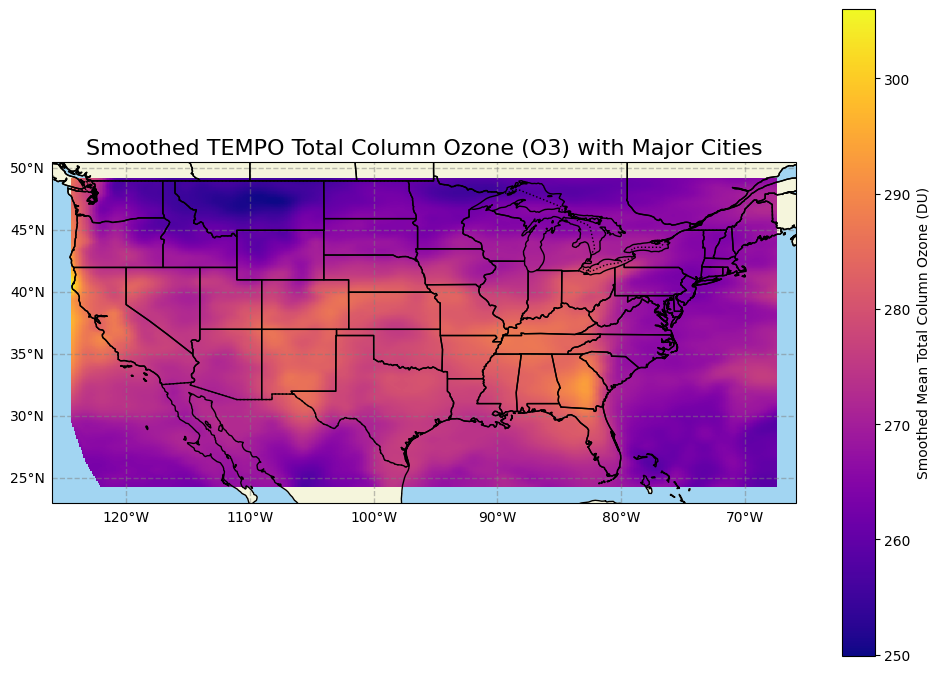

In [51]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
import numpy as np
import geonamescache
from adjustText import adjust_text # Import the library

# --- Data Generation and Interpolation (using your original bbox) ---
bbox_data = (-125, 24, -66.9, 49.5)
heatmap_data_coarse = get_tempo_heatmap_data(
    species='O3',
    start_date='2025-09-29 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data,
    lat_bins=40,
    lon_bins=50
)

if heatmap_data_coarse is not None:
    # --- Interpolate to a smoother grid ---
    grid_lon, grid_lat, smooth_values = interpolate_heatmap(heatmap_data_coarse, resolution_factor=10)
#
    ## --- Plotting Code with adjustText and original zoom ---
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#
    ## --- Define Zoom (using your original padding) ---
    padding = 1.0
    zoomed_out_extent = [bbox_data[0] - padding, bbox_data[2] + padding, bbox_data[1] - padding, bbox_data[3] + padding]
    ax.set_extent(zoomed_out_extent, crs=ccrs.PlateCarree())

    ## --- Plot Heatmap ---
    vmin = np.nanmin(smooth_values)
    vmax = np.nanmax(smooth_values)
    pcm = ax.pcolormesh(
        grid_lon, grid_lat, smooth_values,
        transform=ccrs.PlateCarree(), cmap='plasma', vmin=vmin, vmax=vmax
    )
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', shrink=0.7)
    # Cleaner label for the colorbar
    cbar.set_label('Smoothed Mean Total Column Ozone (DU)')

    # --- Add Geographical Features ---
    ax.add_feature(cfeature.OCEAN, zorder=0, color='#a2d5f2')
    ax.add_feature(cfeature.LAND, zorder=0, color='#f5f5dc')
    ax.add_feature(cfeature.COASTLINE, zorder=3)
    ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=3)
    ax.add_feature(cfeature.STATES, edgecolor='black', zorder=3)

    # --- Get Cities and Prepare Labels ---
    # Use a smaller min_population for this more zoomed-in view
    #cities_to_plot = get_cities_in_bbox(zoomed_out_extent, min_population=100000)
#
    #texts = [] # List to store text objects for adjustment
    #for name, (lon, lat) in cities_to_plot.items():
    #    # Plot a marker for the city point
    #    ax.plot(lon, lat, 'o', markersize=5, color='white', markeredgecolor='black', transform=ccrs.Geodetic(), zorder=4)
    #    # Create the text object and add it to our list
    #    texts.append(ax.text(lon, lat, name, transform=ccrs.Geodetic(),
    #                         fontsize=5, fontweight='bold', zorder=5))
#
    ## --- Automatically Adjust Text to Avoid Overlap ---
    ## This function will move the text objects in the `texts` list around to avoid collisions.
    #adjust_text(texts,
    #            ax=ax,
    #            # Add white arrows pointing from the adjusted label back to the original city point
    #            arrowprops=dict(arrowstyle='-', color='white', lw=1.5, alpha=0.8))

    # --- Final Touches ---
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Cleaner title
    ax.set_title('Smoothed TEMPO Total Column Ozone (O3) with Major Cities', fontsize=16)

    plt.show()

else:
    print("Heatmap data could not be generated.")

In [43]:
!rm tempo.l3.hcho.*

Using cached: ./tempo.l3.no2.vertical_column_total_2025-09-30T000000Z_2025-09-30T235959Z.csv.gz
                    Timestamp(UTC)  LONGITUDE(deg)  LATITUDE(deg)  \
0         2025-09-30T12:08:00-0000      -85.870003      24.010000   
1         2025-09-30T12:08:00-0000      -85.849998      24.010000   
2         2025-09-30T12:08:00-0000      -85.830002      24.010000   
3         2025-09-30T12:08:00-0000      -85.809998      24.010000   
4         2025-09-30T12:08:00-0000      -85.790001      24.010000   
...                            ...             ...            ...   
30490876  2025-09-30T20:28:00-0000      -69.889999      49.490002   
30490877  2025-09-30T20:28:00-0000      -69.870003      49.490002   
30490878  2025-09-30T20:28:00-0000      -69.849998      49.490002   
30490879  2025-09-30T20:28:00-0000      -69.830002      49.490002   
30490880  2025-09-30T20:28:00-0000      -69.809998      49.490002   

          no2_vertical_column_total(molecules/cm2)  Longitude_SW(deg)  \
0 

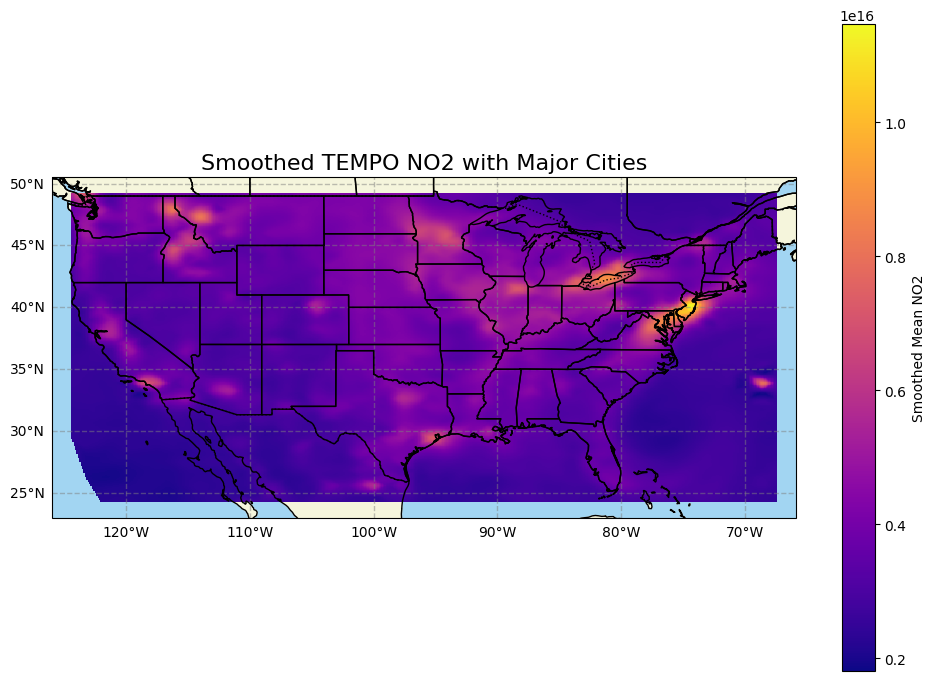

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
import numpy as np
import geonamescache
from adjustText import adjust_text # Import the library

# --- Data Generation and Interpolation (using your original bbox) ---
bbox_data = (-125, 24, -66.9, 49.5)
no2heatmap_data_coarse = get_tempo_heatmap_data(
    species='NO2',
    start_date='2025-09-30 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data,
    lat_bins=40,
    lon_bins=50
)

if no2heatmap_data_coarse is not None:
    # --- Interpolate to a smoother grid ---
    grid_lon, grid_lat, smooth_values = interpolate_heatmap(no2heatmap_data_coarse, resolution_factor=10)
#
    ## --- Plotting Code with adjustText and original zoom ---
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#
    ## --- Define Zoom (using your original padding) ---
    padding = 1.0
    zoomed_out_extent = [bbox_data[0] - padding, bbox_data[2] + padding, bbox_data[1] - padding, bbox_data[3] + padding]
    ax.set_extent(zoomed_out_extent, crs=ccrs.PlateCarree())

    ## --- Plot Heatmap ---
    vmin = np.nanmin(smooth_values)
    vmax = np.nanmax(smooth_values)
    pcm = ax.pcolormesh(
        grid_lon, grid_lat, smooth_values,
        transform=ccrs.PlateCarree(), cmap='plasma', vmin=vmin, vmax=vmax
    )
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', shrink=0.7)
    # Cleaner label for the colorbar
    cbar.set_label('Smoothed Mean NO2')

    # --- Add Geographical Features ---
    ax.add_feature(cfeature.OCEAN, zorder=0, color='#a2d5f2')
    ax.add_feature(cfeature.LAND, zorder=0, color='#f5f5dc')
    ax.add_feature(cfeature.COASTLINE, zorder=3)
    ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=3)
    ax.add_feature(cfeature.STATES, edgecolor='black', zorder=3)

    # --- Get Cities and Prepare Labels ---
    # Use a smaller min_population for this more zoomed-in view
    #cities_to_plot = get_cities_in_bbox(zoomed_out_extent, min_population=100000)
#
    #texts = [] # List to store text objects for adjustment
    #for name, (lon, lat) in cities_to_plot.items():
    #    # Plot a marker for the city point
    #    ax.plot(lon, lat, 'o', markersize=5, color='white', markeredgecolor='black', transform=ccrs.Geodetic(), zorder=4)
    #    # Create the text object and add it to our list
    #    texts.append(ax.text(lon, lat, name, transform=ccrs.Geodetic(),
    #                         fontsize=5, fontweight='bold', zorder=5))
#
    ## --- Automatically Adjust Text to Avoid Overlap ---
    ## This function will move the text objects in the `texts` list around to avoid collisions.
    #adjust_text(texts,
    #            ax=ax,
    #            # Add white arrows pointing from the adjusted label back to the original city point
    #            arrowprops=dict(arrowstyle='-', color='white', lw=1.5, alpha=0.8))

    # --- Final Touches ---
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Cleaner title
    ax.set_title('Smoothed TEMPO NO2 with Major Cities', fontsize=16)

    plt.show()

else:
    print("Heatmap data could not be generated.")

In [63]:
!rm tempo.l3.hcho.*

Using cached: ./tempo.l3.hcho.vertical_column_2025-09-30T000000Z_2025-09-30T235959Z.csv.gz
                    Timestamp(UTC)  LONGITUDE(deg)  LATITUDE(deg)  \
0         2025-09-30T12:08:00-0000      -85.870003      24.010000   
1         2025-09-30T12:08:00-0000      -85.849998      24.010000   
2         2025-09-30T12:08:00-0000      -85.830002      24.010000   
3         2025-09-30T12:08:00-0000      -85.809998      24.010000   
4         2025-09-30T12:08:00-0000      -85.790001      24.010000   
...                            ...             ...            ...   
26234640  2025-09-30T20:28:00-0000      -70.129997      49.490002   
26234641  2025-09-30T20:28:00-0000      -70.110001      49.490002   
26234642  2025-09-30T20:28:00-0000      -69.849998      49.490002   
26234643  2025-09-30T20:28:00-0000      -69.830002      49.490002   
26234644  2025-09-30T20:28:00-0000      -69.809998      49.490002   

          vertical_column(molecules/cm2)  Longitude_SW(deg)  \
0                

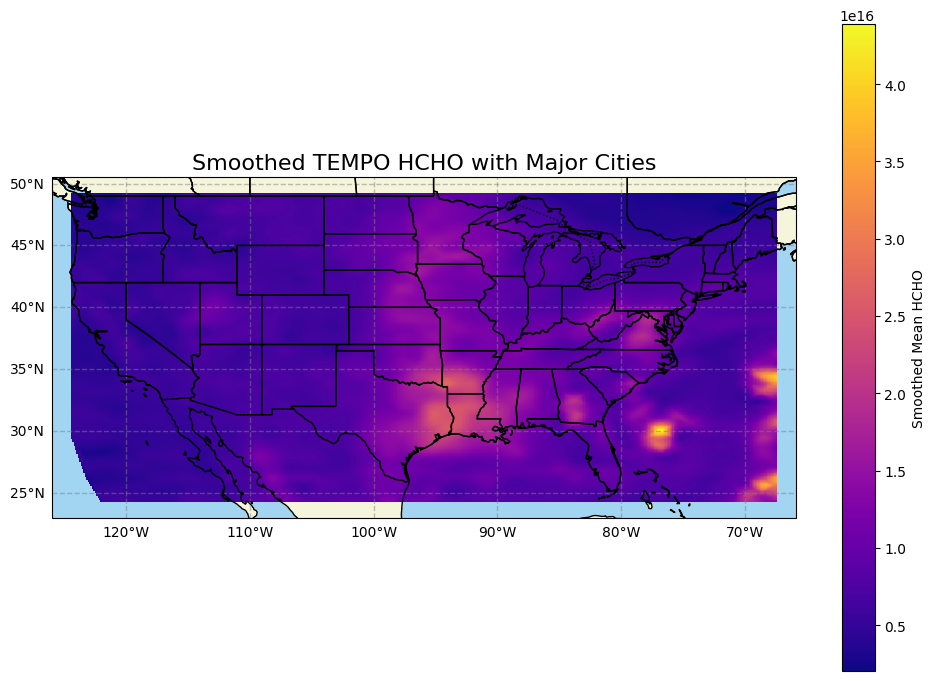

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
import numpy as np
import geonamescache
from adjustText import adjust_text # Import the library

# --- Data Generation and Interpolation (using your original bbox) ---
bbox_data = (-125, 24, -66.9, 49.5)
no2heatmap_data_coarse = get_tempo_heatmap_data(
    species='HCHO',
    start_date='2025-09-30 00',
    end_date='2025-09-30 23:59:59',
    bbox=bbox_data,
    lat_bins=40,
    lon_bins=50
)

if no2heatmap_data_coarse is not None:
    # --- Interpolate to a smoother grid ---
    grid_lon, grid_lat, smooth_values = interpolate_heatmap(no2heatmap_data_coarse, resolution_factor=10)
#
    ## --- Plotting Code with adjustText and original zoom ---
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#
    ## --- Define Zoom (using your original padding) ---
    padding = 1.0
    zoomed_out_extent = [bbox_data[0] - padding, bbox_data[2] + padding, bbox_data[1] - padding, bbox_data[3] + padding]
    ax.set_extent(zoomed_out_extent, crs=ccrs.PlateCarree())

    ## --- Plot Heatmap ---
    vmin = np.nanmin(smooth_values)
    vmax = np.nanmax(smooth_values)
    pcm = ax.pcolormesh(
        grid_lon, grid_lat, smooth_values,
        transform=ccrs.PlateCarree(), cmap='plasma', vmin=vmin, vmax=vmax
    )
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', shrink=0.7)
    # Cleaner label for the colorbar
    cbar.set_label('Smoothed Mean HCHO')

    # --- Add Geographical Features ---
    ax.add_feature(cfeature.OCEAN, zorder=0, color='#a2d5f2')
    ax.add_feature(cfeature.LAND, zorder=0, color='#f5f5dc')
    ax.add_feature(cfeature.COASTLINE, zorder=3)
    ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=3)
    ax.add_feature(cfeature.STATES, edgecolor='black', zorder=3)

    # --- Get Cities and Prepare Labels ---
    # Use a smaller min_population for this more zoomed-in view
    #cities_to_plot = get_cities_in_bbox(zoomed_out_extent, min_population=100000)
#
    #texts = [] # List to store text objects for adjustment
    #for name, (lon, lat) in cities_to_plot.items():
    #    # Plot a marker for the city point
    #    ax.plot(lon, lat, 'o', markersize=5, color='white', markeredgecolor='black', transform=ccrs.Geodetic(), zorder=4)
    #    # Create the text object and add it to our list
    #    texts.append(ax.text(lon, lat, name, transform=ccrs.Geodetic(),
    #                         fontsize=5, fontweight='bold', zorder=5))
#
    ## --- Automatically Adjust Text to Avoid Overlap ---
    ## This function will move the text objects in the `texts` list around to avoid collisions.
    #adjust_text(texts,
    #            ax=ax,
    #            # Add white arrows pointing from the adjusted label back to the original city point
    #            arrowprops=dict(arrowstyle='-', color='white', lw=1.5, alpha=0.8))

    # --- Final Touches ---
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Cleaner title
    ax.set_title('Smoothed TEMPO HCHO with Major Cities', fontsize=16)

    plt.show()

else:
    print("Heatmap data could not be generated.")

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timeResolution')):
  _plot_series(series, series_name, i)
  fig.legend(title='timeResolution', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [ ]:
!ls -l /content/

In [ ]:
/content/tempo

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.8 MB/s eta 0:00:00


In [ ]:
!ls

sample_data
tempo.l3.o3tot.column_amount_o3_2025-09-29T000000Z_2025-09-30T000000Z.csv.gz
tempo.l3.o3tot.column_amount_o3_2025-09-29T000000Z_2025-09-30T000000Z.xdr.gz


In [ ]:
!echo ~/.pycno